### Problem Statement

What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


The data set has 5961 rows and 7 column

In [3]:
#checking the shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


The dataset has 6 object columns and 1 numerical column

In [4]:
#check the null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Rating,Place,Miscellaneous_Info has null values                                 

In [5]:
#checking the Rating column
print(df['Rating'].value_counts())

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
71%       9
76%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
33%       2
63%       2
62%       2
55%       2
64%       2
45%       1
53%       1
58%       1
47%       1
40%       1
65%       1
7%        1
48%       1
36%       1
Name: Rating, dtype: int64


The rating data has percentages, spaning from 7%-100% and majority of the rows are null.


In [6]:
#checking the place column
df['Place'].value_counts()               

HSR Layout, Bangalore              75
Andheri West, Mumbai               70
Dwarka, Delhi                      67
Banjara Hills, Hyderabad           64
Mulund West, Mumbai                54
                                   ..
Peyad, Thiruvananthapuram           1
Perumathura, Thiruvananthapuram     1
Dwarka Sector 13, Delhi             1
Perungalathur, Chennai              1
HAL, Bangalore                      1
Name: Place, Length: 877, dtype: int64

The location information, We can extract the city name for clarity

In [7]:
#checking the Miscellaneous_Info    
df['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
88% 23 Feedback Kondapur, Hyderabad                                                      1
94% 37 Feedback Gachibowli, Hyderabad                                                    1
100% 54 Feedback Medavakkam, Chennai                                                     1
Acrylic Partial Denture Crowns and Bridges Fixing Facial Aesthetic Surgery               1
100% 11 Feedback Shastri Nagar, Delhi                                                    1

Detailed information regarding the doctor, which wont benefit in building the model. we can disregard the same towards the end.

In [8]:
df.drop(['Miscellaneous_Info'],inplace=True,axis=1)

In [9]:
#extracting the city name from the place column
new = df["Place"].str.split(",", n = 1, expand = True)

In [10]:
new[0]

0                     Kakkanad
1                   Whitefield
2              Mathikere - BEL
3            Bannerghatta Road
4                 Keelkattalai
                 ...          
5956              Basavanagudi
5957              Nungambakkam
5958    Greater Kailash Part 2
5959            Vileparle West
5960                 Pitampura
Name: 0, Length: 5961, dtype: object

In [11]:
new[1]

0        Ernakulam
1        Bangalore
2        Bangalore
3        Bangalore
4          Chennai
           ...    
5956     Bangalore
5957       Chennai
5958         Delhi
5959        Mumbai
5960         Delhi
Name: 1, Length: 5961, dtype: object

In [12]:
df['Area']=new[0]

In [13]:
df['City']=new[1]

In [14]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai


In [15]:
#droping the place column

df.drop(['Place'], inplace = True, axis = 1)

In [16]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Profile             0
Fees                0
Area               25
City               26
dtype: int64

In [17]:
#checking unique values in Area
print(df['Area'].nunique())
print(df['Area'].unique())

866
['Kakkanad' 'Whitefield' 'Mathikere - BEL' 'Bannerghatta Road'
 'Keelkattalai' 'Porur' 'Karol Bagh' 'Arekere' 'Old City' 'Athani'
 'Thousand Lights' 'Somajiguda' 'Coimbatore Racecourse' 'Jubilee Hills'
 'Kondli' 'Saroor Nagar' 'Tambaram West' 'Purasawakkam' 'KPHB'
 'HSR Layout' 'Pollachi' 'Vasundhra Enclave' 'Chembur' 'Thammanam'
 'Andheri' 'Pattom' 'Kukatpally' 'Vadavalli' 'Defence Colony'
 'Banjara Hills' 'Sion West' 'CR Park' 'Mogappair East' 'IP Extension'
 'Safdarjung Enclave' 'New Friends Colony' 'Borivali West' 'Saket' 'Malad'
 'Hyder Nagar' 'Dahisar West' 'RT Nagar' 'Powai' 'Basheerbagh'
 'Musheerabad' 'AS Rao Nagar' 'Madhapur' 'Gandhinagar' 'Chetpet'
 'Vileparle East' 'Yelahanka New Town' 'Kodambakkam' 'Malleswaram'
 'Pallikaranai' 'Nallakunta' 'Paschim Vihar' 'Meera Bagh' 'Chattarpur'
 'Andheri West' 'Himayat Nagar' 'Adambakkam' 'Punjabi Bagh' 'Mahalaxmi'
 'Kalina' 'Attapur' 'Lakdikapul' 'Ambattur' 'Ramnagar' 'Shalimar Bagh'
 'Nungambakkam' 'Miyapur' 'Sagarpur' 'Girgaon' 

In [18]:
print(df['Area'].value_counts())

HSR Layout         75
Andheri West       70
Dwarka             68
Banjara Hills      64
Mulund West        54
                   ..
Matunga West        1
Parassala           1
Muttada             1
Cunningham Road     1
TV Museum           1
Name: Area, Length: 866, dtype: int64


In [19]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Profile             0
Fees                0
Area               25
City               26
dtype: int64

#Replacing null values in city with areanames
df.loc[df['City'].isnull(),'Area']='City'
df['City']=df['City'].fillna('City')

In [20]:
#Checking the qualification column
df['Qualification'].value_counts()

BDS                                                                                                                                                                                                                      488
BHMS                                                                                                                                                                                                                     477
BAMS                                                                                                                                                                                                                     471
MBBS                                                                                                                                                                                                                     334
MBBS, MS - ENT                                                                                                      

In [21]:
#We can extract the first string from the columns
qual=df.Qualification.str.split(',',n=1)
qual

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object

In [22]:
#extrating the first str
a=[]
for i in qual:
    a.append(i[0])
a

['BHMS',
 'BAMS',
 'MBBS',
 'BSc - Zoology',
 'BAMS',
 'BAMS',
 'BHMS',
 'BDS',
 'MBBS',
 'BSc',
 'MBBS',
 'BAMS',
 'BDS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'BDS',
 'Diploma in Dermatology',
 'MBBS',
 'BDS',
 'MBBS',
 'DM - Neurology',
 'BAMS',
 'BDS',
 'BDS',
 'BHMS',
 'MBBS',
 'MBBS',
 'BDS',
 'BHMS',
 'BAMS',
 'BAMS',
 'MD - Homeopathy',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'BDS',
 'MBBS',
 'BAMS',
 'MBBS',
 'BDS',
 'BAMS',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'MDS - Prosthodontist And Crown Bridge',
 'BHMS',
 'BHMS',
 'BHMS',
 'MDS - Oral & Maxillofacial Surgery',
 'MBBS',
 'BHMS',
 'MBBS',
 'MDS - Periodontology and Oral Implantology',
 'MBBS',
 'BHMS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'BDS',
 'MD - Dermatology',
 'MDS-Oral Pathology and Oral Microbiology',
 'MBBS',
 'BDS',
 'BAMS',
 'MBBS',
 'BDS',
 'MBBS',
 'BDS',
 'MBBS',
 'MD - Dermatology ',
 'MBBS',
 

In [23]:
b=[]
for i in a:
    b.append(i.split(' '))
b

[['BHMS'],
 ['BAMS'],
 ['MBBS'],
 ['BSc', '-', 'Zoology'],
 ['BAMS'],
 ['BAMS'],
 ['BHMS'],
 ['BDS'],
 ['MBBS'],
 ['BSc'],
 ['MBBS'],
 ['BAMS'],
 ['BDS'],
 ['BDS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MDS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['BDS'],
 ['MBBS'],
 ['MBBS'],
 ['BDS'],
 ['Diploma', 'in', 'Dermatology'],
 ['MBBS'],
 ['BDS'],
 ['MBBS'],
 ['DM', '-', 'Neurology'],
 ['BAMS'],
 ['BDS'],
 ['BDS'],
 ['BHMS'],
 ['MBBS'],
 ['MBBS'],
 ['BDS'],
 ['BHMS'],
 ['BAMS'],
 ['BAMS'],
 ['MD', '-', 'Homeopathy'],
 ['MBBS'],
 ['BDS'],
 ['MBBS'],
 ['MBBS'],
 ['BDS'],
 ['MBBS'],
 ['BAMS'],
 ['MBBS'],
 ['BDS'],
 ['BAMS'],
 ['MBBS'],
 ['BDS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['MBBS'],
 ['BDS'],
 ['MDS', '-', 'Prosthodontist', 'And', 'Crown', 'Bridge'],
 ['BHMS'],
 ['BHMS'],
 ['BHMS'],
 ['MDS', '-', 'Oral', '&', 'Maxillofacial', 'Surgery'],
 ['MBBS'],
 ['BHMS'],
 ['MBBS'],
 ['MDS', '-', 'Periodontology', 'and', 'Oral', 'Implantology'],
 ['MBBS'],
 ['BHM

In [24]:
finalqual=[]
for j in b:
    finalqual.append(j[0])
finalqual
    
    

['BHMS',
 'BAMS',
 'MBBS',
 'BSc',
 'BAMS',
 'BAMS',
 'BHMS',
 'BDS',
 'MBBS',
 'BSc',
 'MBBS',
 'BAMS',
 'BDS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'BDS',
 'Diploma',
 'MBBS',
 'BDS',
 'MBBS',
 'DM',
 'BAMS',
 'BDS',
 'BDS',
 'BHMS',
 'MBBS',
 'MBBS',
 'BDS',
 'BHMS',
 'BAMS',
 'BAMS',
 'MD',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'BDS',
 'MBBS',
 'BAMS',
 'MBBS',
 'BDS',
 'BAMS',
 'MBBS',
 'BDS',
 'MBBS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'MDS',
 'BHMS',
 'BHMS',
 'BHMS',
 'MDS',
 'MBBS',
 'BHMS',
 'MBBS',
 'MDS',
 'MBBS',
 'BHMS',
 'MBBS',
 'MBBS',
 'MBBS',
 'BDS',
 'BDS',
 'MD',
 'MDS-Oral',
 'MBBS',
 'BDS',
 'BAMS',
 'MBBS',
 'BDS',
 'MBBS',
 'BDS',
 'MBBS',
 'MD',
 'MBBS',
 'BAMS',
 'Get',
 'BAMS',
 'BDS',
 'BDS',
 'BHMS',
 'MD',
 'MBBS',
 'BAMS',
 'BDS',
 'BHMS',
 'BDS',
 'BDS',
 'BDS',
 'PhD',
 'MBBS',
 'MBBS',
 'BDS',
 'BAMS',
 'BDS',
 'MRCPS',
 'BAMS',
 'MBBS',
 'BDS',
 'MDS',
 'MB

In [25]:
#creating a new column
df['Education']=finalqual
df['Education'].value_counts()

MBBS    2448
BDS     1208
BAMS     711
BHMS     706
MD       327
        ... 
B.Ac       1
MBA        1
MDS-       1
DGO        1
PGD        1
Name: Education, Length: 73, dtype: int64

In [26]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Area,City,Education
0,"BHMS, MD - Homeopathy",24 years experience,100%,Homeopath,100,Kakkanad,Ernakulam,BHMS
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Ayurveda,350,Whitefield,Bangalore,BAMS
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS
3,"BSc - Zoology, BAMS",12 years experience,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc
4,BAMS,20 years experience,100%,Ayurveda,250,Keelkattalai,Chennai,BAMS


In [27]:
#droping qualification
df.drop(['Qualification'],axis=1,inplace=True)
df.head()

,Experience,Rating,Profile,Fees,Area,City,Education
0,24 years experience,100%,Homeopath,100,Kakkanad,Ernakulam,BHMS
1,12 years experience,98%,Ayurveda,350,Whitefield,Bangalore,BAMS
2,9 years experience,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS
3,12 years experience,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc
4,20 years experience,100%,Ayurveda,250,Keelkattalai,Chennai,BAMS


In [28]:
#droping the Rating column as most of the values are empty and rplacing them could affect prediction
df.drop(['Rating'],axis=1,inplace=True)
df.head()

,Experience,Profile,Fees,Area,City,Education
0,24 years experience,Homeopath,100,Kakkanad,Ernakulam,BHMS
1,12 years experience,Ayurveda,350,Whitefield,Bangalore,BAMS
2,9 years experience,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS
3,12 years experience,Ayurveda,250,Bannerghatta Road,Bangalore,BSc
4,20 years experience,Ayurveda,250,Keelkattalai,Chennai,BAMS


In [29]:
#handling the experience column
exp=df.Experience.str.split(' ',n=1)
exp

0       [24, years experience]
1       [12, years experience]
2        [9, years experience]
3       [12, years experience]
4       [20, years experience]
                 ...          
5956    [19, years experience]
5957    [33, years experience]
5958    [41, years experience]
5959    [15, years experience]
5960    [17, years experience]
Name: Experience, Length: 5961, dtype: object

In [30]:
#extracting years
finalexp=[]
for year in exp:
    finalexp.append(year[0])
finalexp

['24',
 '12',
 '9',
 '12',
 '20',
 '8',
 '42',
 '10',
 '14',
 '23',
 '5',
 '7',
 '9',
 '21',
 '12',
 '10',
 '24',
 '5',
 '19',
 '19',
 '21',
 '14',
 '41',
 '31',
 '23',
 '5',
 '25',
 '12',
 '16',
 '15',
 '7',
 '11',
 '14',
 '23',
 '9',
 '15',
 '10',
 '12',
 '31',
 '16',
 '8',
 '12',
 '31',
 '8',
 '22',
 '7',
 '16',
 '31',
 '8',
 '10',
 '42',
 '9',
 '22',
 '10',
 '9',
 '25',
 '14',
 '11',
 '24',
 '38',
 '8',
 '12',
 '14',
 '5',
 '22',
 '14',
 '6',
 '36',
 '6',
 '13',
 '13',
 '11',
 '18',
 '46',
 '41',
 '40',
 '7',
 '13',
 '12',
 '10',
 '49',
 '9',
 '20',
 '11',
 '10',
 '16',
 '24',
 '33',
 '10',
 '36',
 '8',
 '0',
 '15',
 '7',
 '12',
 '12',
 '13',
 '24',
 '27',
 '12',
 '9',
 '16',
 '22',
 '20',
 '30',
 '52',
 '13',
 '19',
 '16',
 '10',
 '60',
 '12',
 '11',
 '15',
 '6',
 '5',
 '9',
 '21',
 '7',
 '20',
 '10',
 '12',
 '12',
 '26',
 '31',
 '15',
 '11',
 '11',
 '5',
 '24',
 '13',
 '12',
 '5',
 '8',
 '8',
 '35',
 '24',
 '14',
 '19',
 '34',
 '21',
 '13',
 '39',
 '35',
 '36',
 '19',
 '10',
 '7'

In [31]:
#creating new column
df['Experienceinyears']=finalexp
df.head()

,Experience,Profile,Fees,Area,City,Education,Experienceinyears
0,24 years experience,Homeopath,100,Kakkanad,Ernakulam,BHMS,24
1,12 years experience,Ayurveda,350,Whitefield,Bangalore,BAMS,12
2,9 years experience,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,9
3,12 years experience,Ayurveda,250,Bannerghatta Road,Bangalore,BSc,12
4,20 years experience,Ayurveda,250,Keelkattalai,Chennai,BAMS,20


In [32]:
#droping Experience column
df.drop(['Experience'],inplace=True,axis=1)
df.head()

,Profile,Fees,Area,City,Education,Experienceinyears
0,Homeopath,100,Kakkanad,Ernakulam,BHMS,24
1,Ayurveda,350,Whitefield,Bangalore,BAMS,12
2,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,9
3,Ayurveda,250,Bannerghatta Road,Bangalore,BSc,12
4,Ayurveda,250,Keelkattalai,Chennai,BAMS,20


In [33]:
df.isnull().sum()

Profile               0
Fees                  0
Area                 25
City                 26
Education             0
Experienceinyears     0
dtype: int64

In [34]:
df.shape

(5961, 6)

In [35]:
#droping the null values in Area and city as replacimnng the same with anything doesnt make sense
df.dropna(axis=0,inplace=True)
df.shape

(5935, 6)

In [36]:
#checking null
df.isnull().sum()

Profile              0
Fees                 0
Area                 0
City                 0
Education            0
Experienceinyears    0
dtype: int64

Dentist             1396
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


<AxesSubplot:xlabel='Profile', ylabel='count'>

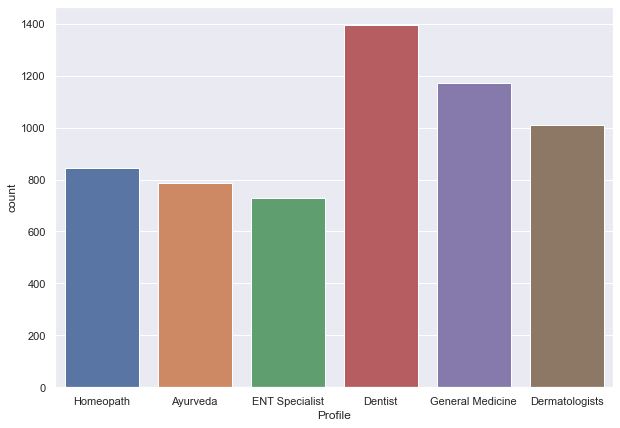

In [37]:
#checking columns
print(df['Profile'].value_counts())
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,7))
sns.countplot(df['Profile'])

6 Major catogory doctors

Majority in the dataset are Dentists

followed by General Medicine Doctors

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5, Delhi          1
Name: City, dtype: int64


<AxesSubplot:xlabel='City', ylabel='count'>

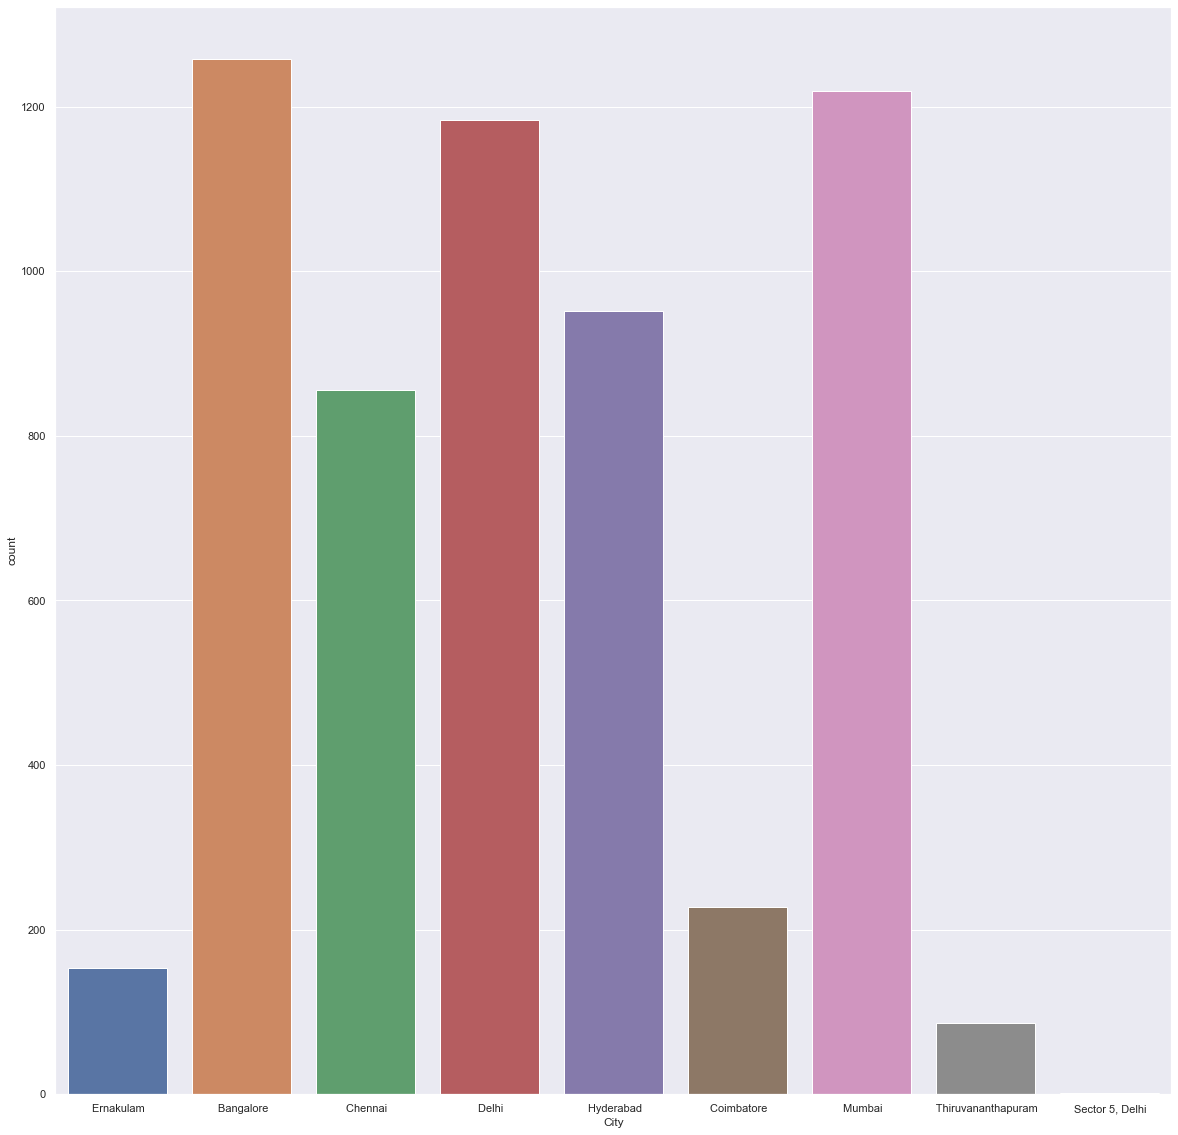

In [38]:
#checking columns
print(df['City'].value_counts())
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,20))
sns.countplot(df['City'])

Bangalore,Delhi and Mumbai- Major share of doctors in the dataset are from the three cities, followed by hyderabad and chennai.

MBBS        2447
BDS         1207
BAMS         711
BHMS         706
MD           327
            ... 
B.Ac           1
MBA            1
Cochlear       1
BIMS           1
PGD            1
Name: Education, Length: 72, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

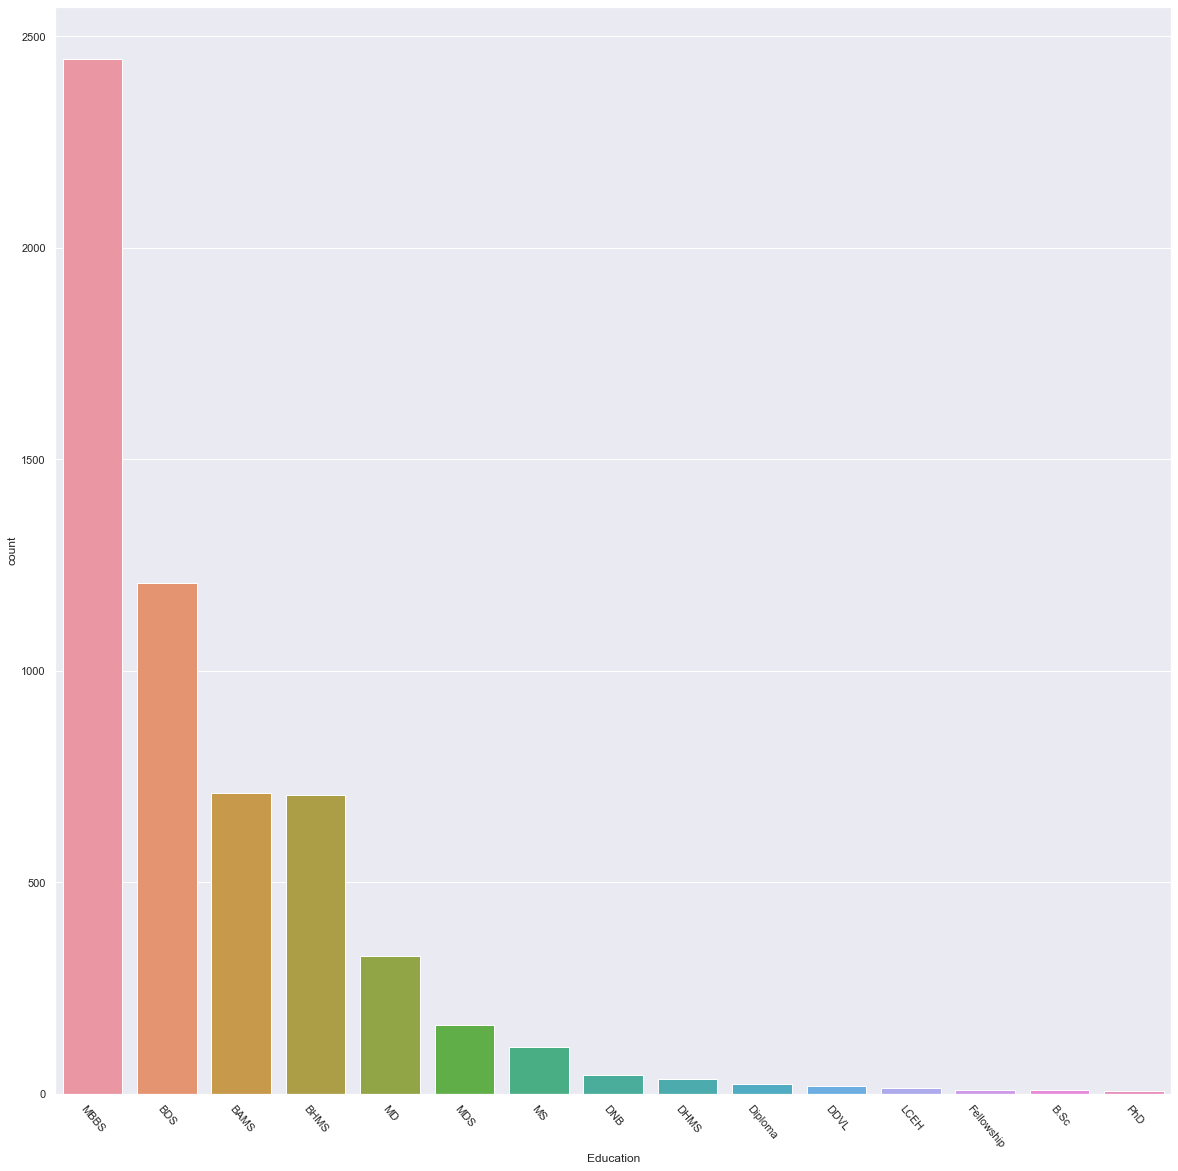

In [39]:
#checking columns
print(df['Education'].value_counts())
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,20))
plt.xticks(rotation=-50)
sns.countplot(df['Education'],order=df['Education'].value_counts().iloc[:15].index)

Checking the top 15 records in the education catogory

Majority of the doctors have MBBS education followed by BDS,BAMS and BHMS

9     323
10    294
11    288
8     282
12    279
     ... 
58      1
65      1
59      1
60      1
66      1
Name: Experienceinyears, Length: 64, dtype: int64


<AxesSubplot:xlabel='Experienceinyears', ylabel='Count'>

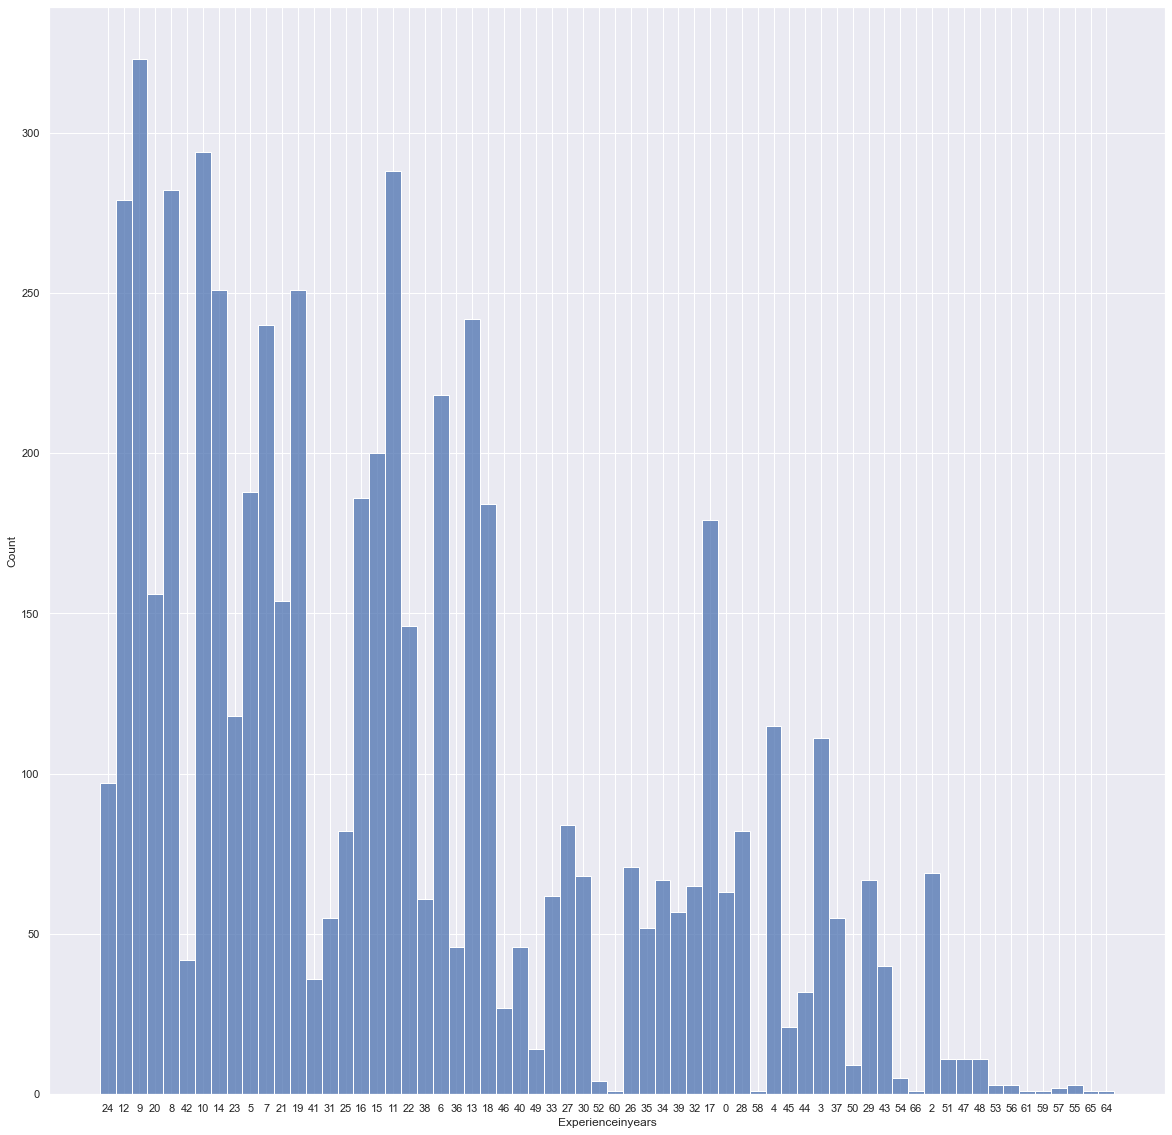

In [40]:
#checking columns with null values
print(df['Experienceinyears'].value_counts())
plt.figure(figsize=(20,20))
sns.histplot(df['Experienceinyears'],bins=20)

9 year experience seems to be the majority in the dataset.
The experiences range from 24-64 years

100    1282
500     938
200     904
300     864
400     424
250     306
150     252
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


<AxesSubplot:xlabel='Fees', ylabel='Count'>

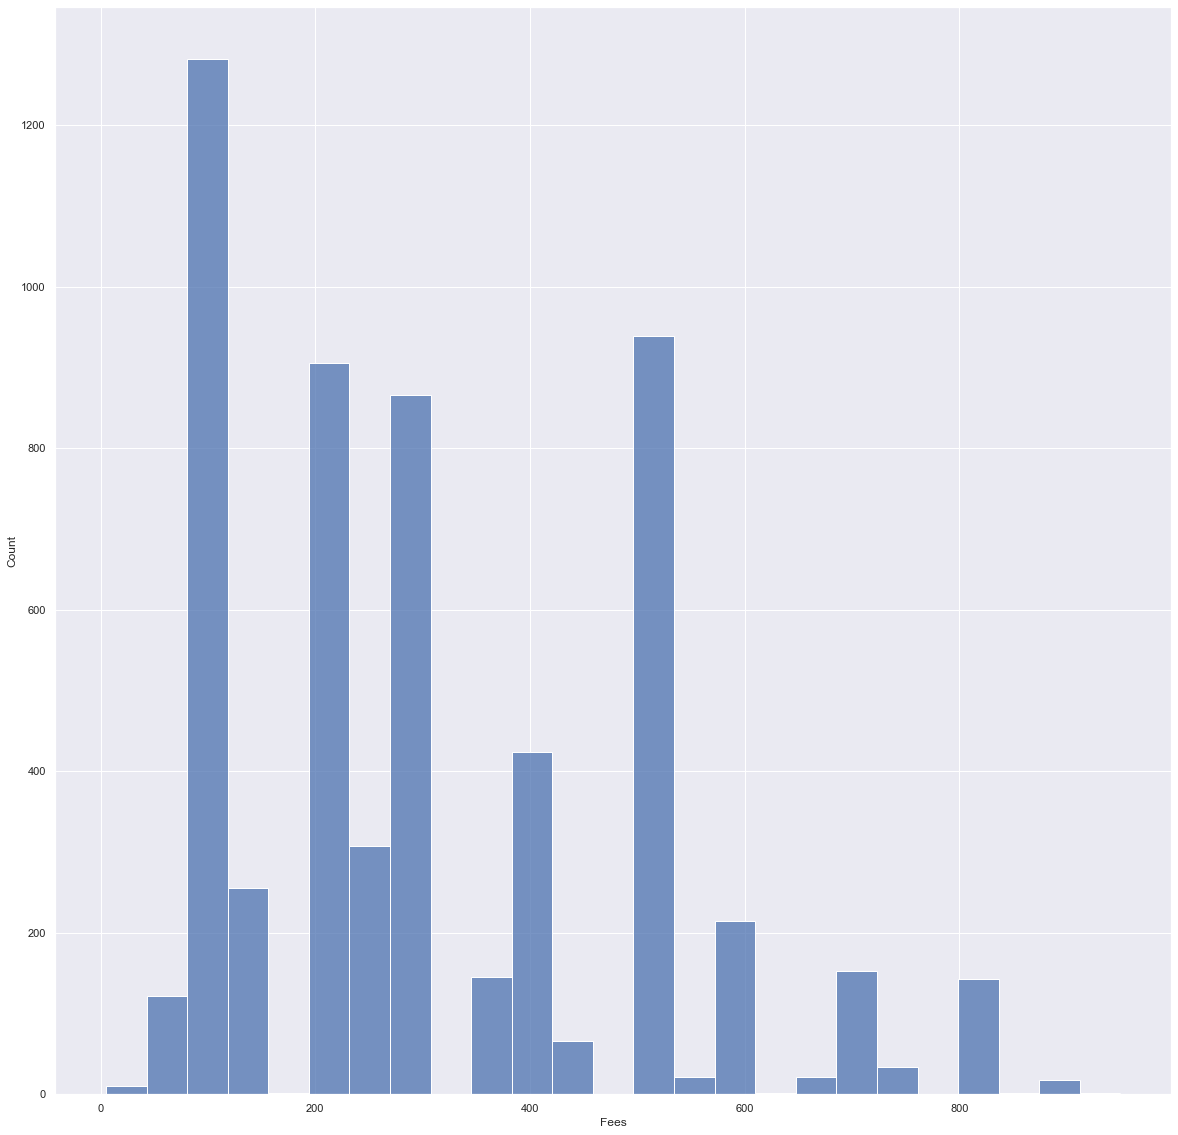

In [41]:
#checking columns with null values
print(df['Fees'].value_counts())
plt.figure(figsize=(20,20))
sns.histplot(df['Fees'])

The fees column is our target variable, the dataset can be taken as both regression and classification,

The fees ranges from Rs.5 to Rs.950

In [42]:
df.columns

Index(['Profile', 'Fees', 'Area', 'City', 'Education', 'Experienceinyears'], dtype='object')

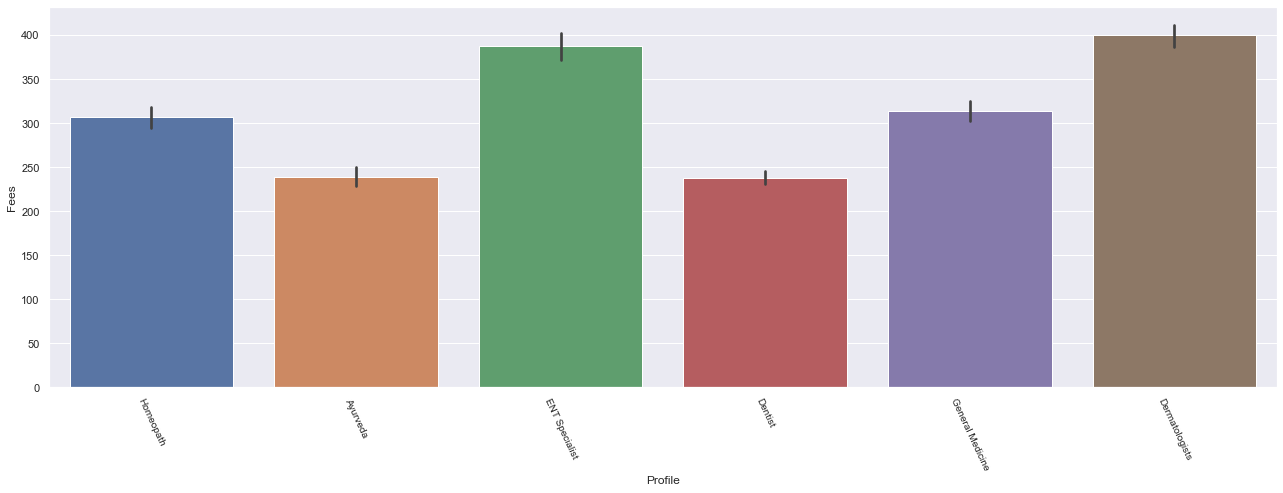

In [43]:
#plotting against the target column
plt.figure(figsize = (22,7))
sns.barplot(x='Profile',y='Fees',data=df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Dermatologists seems to be having the highest fees

Dentists have the lowest fees in the overall dataset

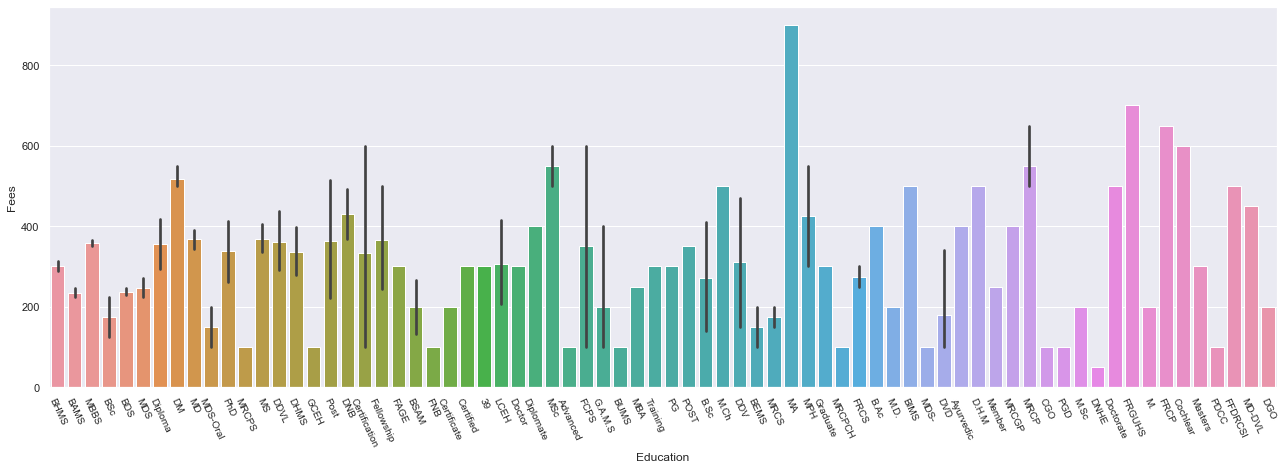

In [44]:
#plotting against the target column
plt.figure(figsize = (22,7))
sns.barplot(x='Education',y='Fees',data=df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

The fees distribution based on the education of the doctors.

A doctor with MA education seems to be having the highest feee.



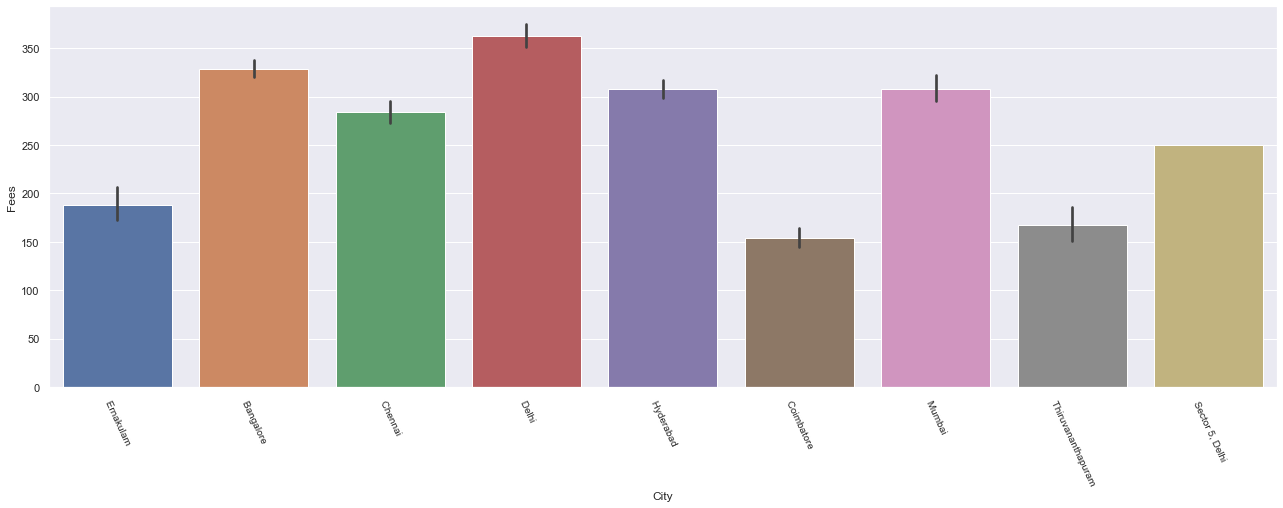

In [45]:
#plotting against the target column
plt.figure(figsize = (22,7))
sns.barplot(x='City',y='Fees',data=df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Doctors from Delhi have the highest fee followed by bangalore

The Doctors from Coibatore has the lowest

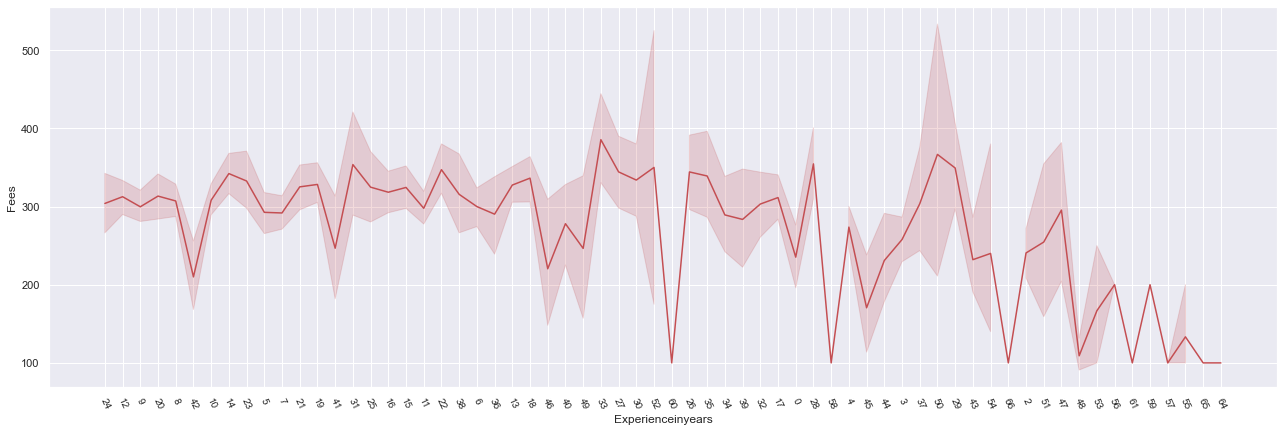

In [46]:
#plotting against the target column
plt.figure(figsize = (22,7))
sns.lineplot(x='Experienceinyears',y='Fees',data=df, color='r')
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

The experience data seems to be showing that the doctors tend to collect lesser fee as they get older and the experience increases

Doctors around 40 years of exp seem to be collecting the highest fee

### Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Area'] = oe.fit_transform(df['Area'].values.reshape(-1,1))
df['Profile'] = oe.fit_transform(df['Profile'].values.reshape(-1,1))
df['City'] = oe.fit_transform(df['City'].values.reshape(-1,1))
df['Experienceinyears'] = oe.fit_transform(df['Experienceinyears'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))

In [48]:
df.head()

,Profile,Fees,Area,City,Education,Experienceinyears
0,5.0,100,296.0,4.0,8.0,16.0
1,0.0,350,855.0,0.0,5.0,3.0
2,3.0,300,452.0,0.0,49.0,63.0
3,0.0,250,68.0,0.0,11.0,3.0
4,0.0,250,335.0,1.0,5.0,12.0


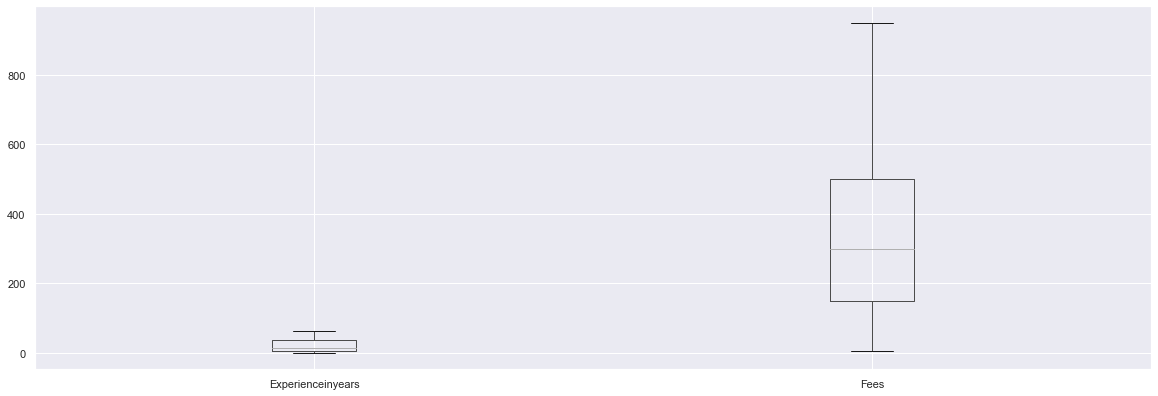

In [49]:
num_cols=['Experienceinyears','Fees']
df[num_cols].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)

The boxplots are not showing presence of outliers

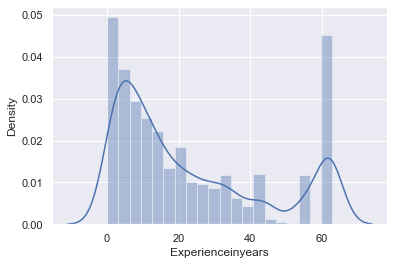

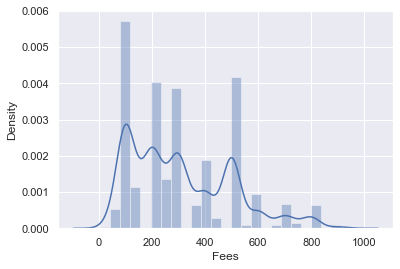

In [50]:
#checking the skewness
for i in num_cols:
    plt.subplots()
    sns.distplot(df[i])

The experience column shows a right skewness

In [51]:
#checking correlation
dfcor=df.corr()
dfcor

,Profile,Fees,Area,City,Education,Experienceinyears
Profile,1.000000,0.144357,0.019013,-0.014918,0.351261,-0.034063
Fees,0.144357,1.000000,-0.056151,-0.030842,0.253822,-0.053714
Area,0.019013,-0.056151,1.000000,-0.086510,0.002336,-0.001614
City,-0.014918,-0.030842,-0.086510,1.000000,-0.036161,0.039423
Education,0.351261,0.253822,0.002336,-0.036161,1.000000,0.002648
Experienceinyears,-0.034063,-0.053714,-0.001614,0.039423,0.002648,1.000000


<AxesSubplot:>

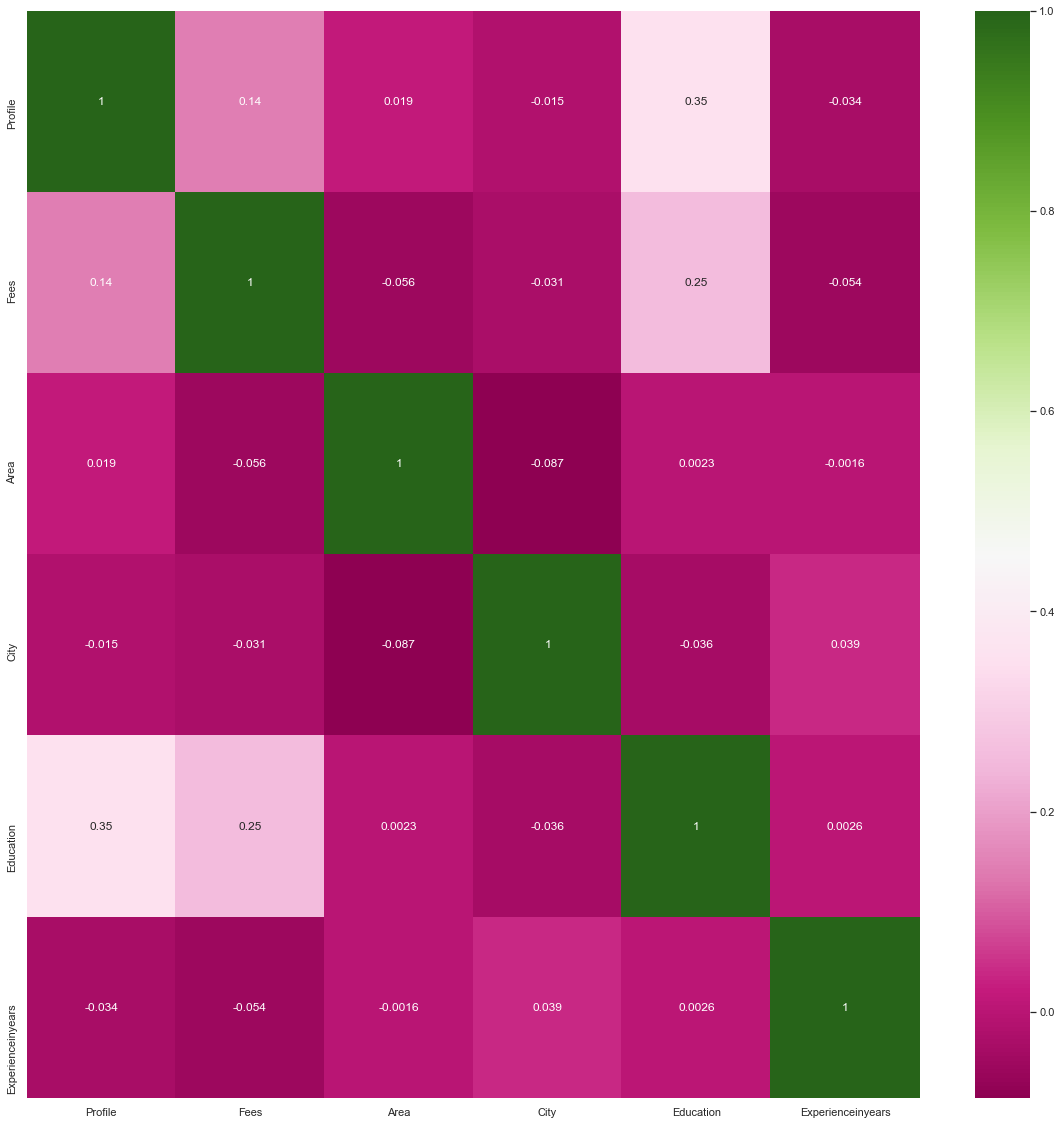

In [52]:
#plotting the correlation
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap="PiYG")

The Education and Profile seems to be having the highest possitive correlation

In [53]:
#checking correlation to the target 
dfcor['Fees'].sort_values(ascending=False)

Fees                 1.000000
Education            0.253822
Profile              0.144357
City                -0.030842
Experienceinyears   -0.053714
Area                -0.056151
Name: Fees, dtype: float64

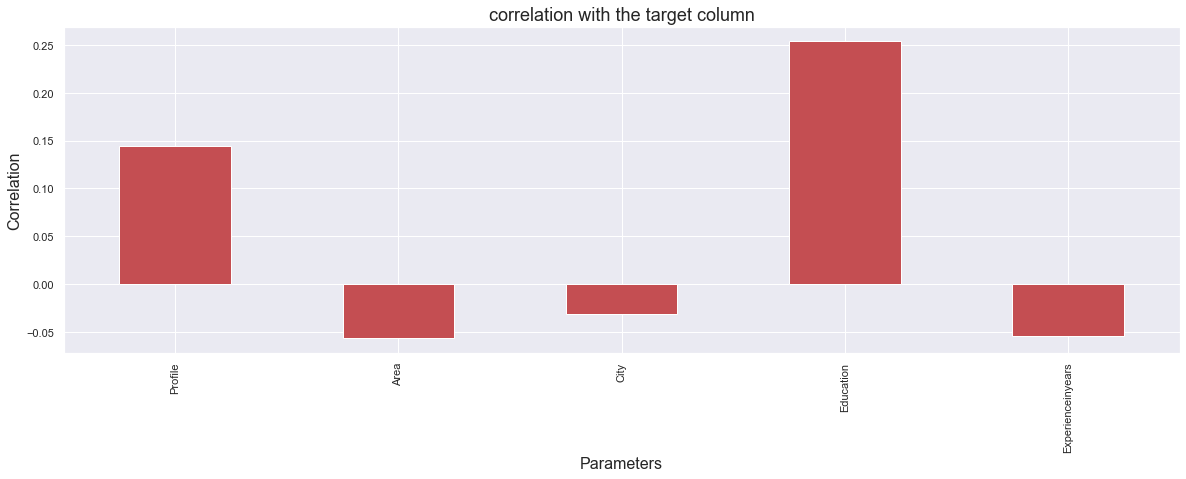

In [54]:
#plotting the correlation to the target column
plt.figure(figsize = (20,6))
dfcor['Fees'].drop(['Fees']).plot(kind = 'bar', color = 'r')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

The Education, Profile has possitive correlation on the Fee column

Area City and experience shows a negative correlation

In [55]:
#handling skewness
df.skew()

Profile              0.105024
Fees                 0.747349
Area                 0.113831
City                 0.046030
Education           -0.111751
Experienceinyears    0.819508
dtype: float64

df['Fees']=np.cbrt(df['Fees'])
df['Experienceinyears']=np.cbrt(df['Experienceinyears'])
df.skew()

In [56]:
#splitting x and y
x = df.drop('Fees', axis = 1)
y = df['Fees']

In [57]:
x.shape

(5935, 5)

In [58]:
y.shape

(5935,)

In [59]:
x

,Profile,Area,City,Education,Experienceinyears
0,5.0,296.0,4.0,8.0,16.0
1,0.0,855.0,0.0,5.0,3.0
2,3.0,452.0,0.0,49.0,63.0
3,0.0,68.0,0.0,11.0,3.0
4,0.0,335.0,1.0,5.0,12.0
...,...,...,...,...,...
5956,3.0,70.0,0.0,49.0,10.0
5957,4.0,535.0,1.0,49.0,26.0
5958,4.0,215.0,3.0,49.0,35.0
5959,4.0,840.0,6.0,49.0,6.0


In [60]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5935, dtype: int64

In [61]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [62]:
#checking the best random state

lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.25603593486805165 on random state 163


In [63]:
#spitting with best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 163)

In [64]:
x_train.shape

(4154, 5)

In [65]:
x_test.shape

(1781, 5)

In [66]:
y_train.shape

(4154,)

In [67]:
y_test.shape

(1781,)

In [68]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    ##print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    ##print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x, y, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    ##print('Cross validation Scores for ', mod)
    ##print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean cross validation Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [69]:
model(LogisticRegression())

Model: LogisticRegression()




Accuracy score: 0.25603593486805165


Mean cross validation Score:  0.23403538331929236
difference between crossvalidation score and actual score: 0.022000551548759295


In [70]:
model(GaussianNB())

Model: GaussianNB()




Accuracy score: 0.20887142055025268


Mean cross validation Score:  0.18517270429654592
difference between crossvalidation score and actual score: 0.02369871625370676


In [71]:
model(RandomForestClassifier())

Model: RandomForestClassifier()




Accuracy score: 0.26838854576080856


Mean cross validation Score:  0.2670598146588037
difference between crossvalidation score and actual score: 0.0013287311020048764


In [72]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.23806850084222347


Mean cross validation Score:  0.2375737152485257
difference between crossvalidation score and actual score: 0.000494785593697783


In [73]:
model(KNeighborsClassifier())

Model: KNeighborsClassifier()




Accuracy score: 0.23806850084222347


Mean cross validation Score:  0.23892165122156697
difference between crossvalidation score and actual score: -0.000853150379343498


In [74]:
model(AdaBoostClassifier())

Model: AdaBoostClassifier()




Accuracy score: 0.22515440763615946


Mean cross validation Score:  0.20505475989890481
difference between crossvalidation score and actual score: 0.020099647737254644


The kneighbours classifier gives the best accuracy based the crossvalidation score

### Hyper-Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : [1,5,10],
              'n_neighbors' : [3,5,11,19],
              'p':[1,2],
              'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}

In [76]:
knc=KNeighborsClassifier()
clf = GridSearchCV(knc, parameters,verbose=1)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}


In [77]:
knc_f=KNeighborsClassifier(leaf_size=10, p=1,n_neighbors=19,weights='distance',metric='manhattan')
knc_f.fit(x_train,y_train)
knc_f.score(x_train, y_train)
pred = knc_f.predict(x_test)
print(confusion_matrix(y_test, pred))
print('\n')
print('\n')
print(classification_report(y_test, pred))
accuracy=accuracy_score(y_test, pred)
print("Accuracy score:",accuracy)

[[  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0  11   0   0   1   3   0   3   0   1   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   4   0   0   0   0   0   1   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   1   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   5   1   1   0 213   0   1   9  62   6  39   0   6   0  38
    0   4   0   0   4   1   5   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

### Saving the model

In [78]:
import joblib
joblib.dump(knc_f, 'Doctor_fee.obj')

['Doctor_fee.obj']

### Importing test data

In [79]:
test = pd.read_excel('Final_Test.xlsx')

In [80]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [81]:
test.drop(['Miscellaneous_Info'],inplace=True,axis=1)

In [82]:
new = test["Place"].str.split(",", n = 1, expand = True)
test['Area']=new[0]
test['City']=new[1]

In [83]:
#droping the place column

test.drop(['Place'], inplace = True, axis = 1)

In [84]:
#We can extract the first string from the columns
qual=test.Qualification.str.split(',',n=1)

In [85]:
#extrating the first str
a=[]
for i in qual:
    a.append(i[0])

In [86]:
b=[]
for i in a:
    b.append(i.split(' '))

In [87]:
finalqual=[]
for j in b:
    finalqual.append(j[0])

In [88]:
#creating a new column
test['Education']=finalqual

In [89]:
test.drop(['Qualification'],axis=1,inplace=True)

In [90]:
#droping the Rating column as most of the values are empty and rplacing them could affect prediction
test.drop(['Rating'],axis=1,inplace=True)

In [91]:
#handling the experience column
exp=test.Experience.str.split(' ',n=1)

In [92]:
#extracting years
finalexp=[]
for year in exp:
    finalexp.append(year[0])

In [93]:
#creating new column
test['Experienceinyears']=finalexp

In [94]:
#droping Experience column
test.drop(['Experience'],inplace=True,axis=1)

In [97]:
test.head()

,Profile,Area,City,Education,Experienceinyears
0,General Medicine,4.0,Mumbai,MBBS,35
1,ENT Specialist,3.0,Hyderabad,MBBS,31
2,Dermatologists,2.0,Chennai,MBBS,40
3,Ayurveda,0.0,Delhi,BAMS,0
4,Dentist,1.0,Bangalore,BDS,16


In [98]:
test.isnull().sum()

Profile              0
Area                 0
City                 6
Education            0
Experienceinyears    0
dtype: int64

In [99]:
#droping the null values in Area and city as replacimnng the same with anything doesnt make sense
test.dropna(axis=0,inplace=True)

In [101]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
test['Area'] = oe.fit_transform(test['Area'].values.reshape(-1,1))
test['Profile'] = oe.fit_transform(test['Profile'].values.reshape(-1,1))
test['City'] = oe.fit_transform(test['City'].values.reshape(-1,1))
test['Experienceinyears'] = oe.fit_transform(test['Experienceinyears'].values.reshape(-1,1))
test['Education'] = oe.fit_transform(test['Education'].values.reshape(-1,1))

In [102]:
test.head()

,Profile,Area,City,Education,Experienceinyears
0,4.0,4.0,6.0,30.0,28.0
1,3.0,3.0,5.0,30.0,24.0
2,2.0,2.0,1.0,30.0,34.0
3,0.0,0.0,3.0,1.0,0.0
4,1.0,1.0,0.0,2.0,7.0


### Importing Model

In [103]:
testing = joblib.load('Doctor_fee.obj')
test_prediction = testing.predict(test)

In [104]:
pd.DataFrame(test_prediction)

,0
0,300
1,500
2,500
3,100
4,100
...,...
1976,100
1977,500
1978,500
1979,100
